In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
import matplotlib as mpl
import plotly.express as px
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme()
import os

In [112]:
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
column_names = ["age", "sex", "cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data_list =[]

df1 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.cleveland.data", names = column_names)
df2 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.hungarian.data", names = column_names)
df3 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.switzerland.data", names = column_names)
df4 = pd.read_csv("/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/UCI original/processed.va.data", names = column_names)


df1_1= df1.append(df2)
df2_2= df3.append(df4)

df_final= df1_1.append(df2_2)


print(df_final.head())

    age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   ca  \
0  63.0  1.0  1.0      145  233   1       2     150     0     2.3     3  0.0   
1  67.0  1.0  4.0      160  286   0       2     108     1     1.5     2  3.0   
2  67.0  1.0  4.0      120  229   0       2     129     1     2.6     2  2.0   
3  37.0  1.0  3.0      130  250   0       0     187     0     3.5     3  0.0   
4  41.0  0.0  2.0      130  204   0       2     172     0     1.4     1  0.0   

  thal  num  
0  6.0    0  
1  3.0    2  
2  7.0    1  
3  3.0    0  
4  3.0    0  


In [4]:
print(df_final.info())
print(df_final.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB
None
(920, 14)


In [5]:
print(df_final.describe())

              age         sex          cp         num
count  920.000000  920.000000  920.000000  920.000000
mean    53.510870    0.789130    3.250000    0.995652
std      9.424685    0.408148    0.930969    1.142693
min     28.000000    0.000000    1.000000    0.000000
25%     47.000000    1.000000    3.000000    0.000000
50%     54.000000    1.000000    4.000000    1.000000
75%     60.000000    1.000000    4.000000    2.000000
max     77.000000    1.000000    4.000000    4.000000


In [7]:
df_final.to_csv('multi2.csv', encoding='utf-8')

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [19]:
#"trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"


dataframe=pd.read_csv('multi2.csv')
index_invalid_ca = dataframe[dataframe.ca == '?'].index
dataframe.drop(index_invalid_ca, inplace = True)
dataframe.ca = pd.to_numeric(dataframe.ca, downcast = 'float')

index_invalid_thal = dataframe[dataframe.thal == '?'].index
dataframe.drop(index_invalid_thal, inplace = True)
dataframe.thal = pd.to_numeric(dataframe.thal, downcast = 'float')


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    object 
 4   chol      299 non-null    object 
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalach   299 non-null    object 
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    object 
 10  slope     299 non-null    object 
 11  ca        299 non-null    float32
 12  thal      299 non-null    float32
 13  num       299 non-null    int64  
dtypes: float32(2), int64(4), object(8)
memory usage: 32.7+ KB


In [23]:
dataframe.to_csv('pre10.csv', encoding='utf-8')

In [73]:

dataframe=pd.read_csv('pre10.csv',index_col=0)
print(dataframe.describe())
dataframe.num.value_counts()
dataframe.info()

              age        sex          cp    trestbps        chol         fbs  \
count  299.000000  299.00000  299.000000  299.000000  299.000000  299.000000   
mean    54.521739    0.67893    3.163880  131.715719  246.785953    0.143813   
std      9.030264    0.46767    0.964069   17.747751   52.532582    0.351488   
min     29.000000    0.00000    1.000000   94.000000  100.000000    0.000000   
25%     48.000000    0.00000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.00000    3.000000  130.000000  242.000000    0.000000   
75%     61.000000    1.00000    4.000000  140.000000  275.500000    0.000000   
max     77.000000    1.00000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  299.000000  299.000000  299.000000  299.000000  299.000000  299.000000  
mean     0.989967  149.327759    0.331104    1.058528    1.605351    0.946488  
std      0.994903   23.121062    0.4713

In [74]:
#data.to_csv('three.csv', encoding='utf-8')

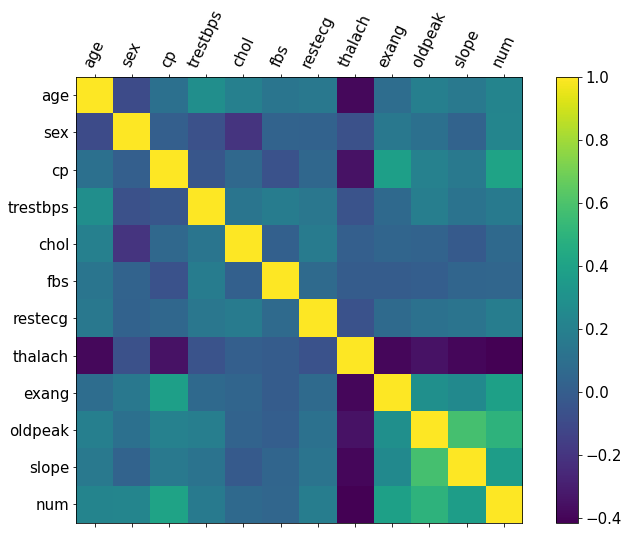

In [75]:
correlationMatrix = dataframe.corr() 

f = plt.figure(figsize=(12, 8))
plt.matshow(correlationMatrix, fignum=f.number, cmap='viridis')
plt.xticks(range(dataframe.shape[1]), dataframe.columns, fontsize=15, rotation=65)
plt.yticks(range(dataframe.shape[1]), dataframe.columns, fontsize=15)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.show()

In [76]:
correlationMatrix.style.background_gradient(cmap='viridis').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.00,-0.09,0.11,0.29,0.20,0.13,0.15,-0.38,0.09,0.20,0.16,0.22
sex,-0.09,1.00,0.01,-0.07,-0.20,0.04,0.03,-0.07,0.15,0.11,0.04,0.23
cp,0.11,0.01,1.00,-0.04,0.06,-0.06,0.06,-0.34,0.38,0.20,0.15,0.40
trestbps,0.29,-0.07,-0.04,1.00,0.13,0.18,0.15,-0.05,0.07,0.19,0.12,0.16
chol,0.20,-0.20,0.06,0.13,1.00,0.02,0.17,0.01,0.04,0.03,-0.02,0.07
fbs,0.13,0.04,-0.06,0.18,0.02,1.00,0.07,-0.00,-0.00,0.01,0.05,0.05
restecg,0.15,0.03,0.06,0.15,0.17,0.07,1.00,-0.06,0.07,0.11,0.13,0.18
thalach,-0.38,-0.07,-0.34,-0.05,0.01,-0.00,-0.06,1.00,-0.39,-0.35,-0.39,-0.42
exang,0.09,0.15,0.38,0.07,0.04,-0.00,0.07,-0.39,1.00,0.29,0.25,0.39
oldpeak,0.20,0.11,0.20,0.19,0.03,0.01,0.11,-0.35,0.29,1.00,0.58,0.50


In [81]:
# ML Algorithms to be used
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as LGBMClassifier
from sklearn.svm import SVR
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier


In [84]:
dataframe.num = dataframe.num.where(dataframe.num < 2, 2)

#update index
dataframe = dataframe.reset_index()

In [85]:
dataX = dataframe.copy().drop(['num'],axis=1)
dataY = dataframe['num'].astype(int).copy()

In [86]:
dataY.value_counts()

0    160
2     83
1     56
Name: num, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [29]:
#d=pd.read_csv('/Users/Asus/Desktop/IDP/IDP_3-2 finals/Algorithm/Datasets/pre2.csv',index_col=0)
#Desktop/IDP/IDP_3-2 finals/Algorithm/Datasets/three.csv

In [88]:
featuresToScale = dataX.columns
sX = StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(dataX,
dataY, test_size=0.3,
random_state=2021, stratify=dataY)

y_test.value_counts()

0    48
2    25
1    17
Name: num, dtype: int64

In [97]:
def anomalyScore (originalDF, reducedDF):
  loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
  loss = pd.Series(data=loss,index=originalDF.index)
  loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
  return loss

In [100]:


def plotResults(trueLabels, anomalyScore, returnPreds = False, plotting = True):
  preds = pd.concat([trueLabels, anomalyScore], axis=1)
  preds.columns = ['trueLabel', 'anomalyScore']
  
  precision, recall, thresholds = \
  precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
  

  average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])
  if plotting:
    plt.step(recall, precision, color='b', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.1])
    plt.xlim([0.0, 1.0])
    plt.title('Average Precision = {0:0.2f}'.format(average_precision))

  if returnPreds==True:
    return preds, average_precision



In [101]:
n_components =11
svd_solver = 'auto'
random_state = 2021

In [114]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=n_components,kernel = 'linear', fit_inverse_transform = True ,random_state= 2021)

In [115]:
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)

In [116]:
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

In [117]:
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

In [119]:
anomalyScorePCA = anomalyScore(X_train, X_train_PCA_inverse)


In [120]:
trigger_PCA = True
if trigger_PCA == True:
  X_train = X_train_PCA
  X_test = X_test_PCA

In [121]:
k_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=2021)


In [122]:
penalty = 'l2' 
C = 0.1
random_state = 2021
solver = 'liblinear'
logReg = LogisticRegression(penalty=penalty, C=C,random_state=random_state, solver=solver)

In [127]:
penalty = ['l2']
C = np.arange(0.01, 1, 0.1 )
random_state = 2021
solver = ['lbfgs', 'liblinear', 'saga']
grid = {'penalty': penalty,'C':C, 'solver': solver}

gridSearch = GridSearchCV(logReg, grid, scoring='accuracy', cv=k_fold, refit=True)
gridSearch.fit(X_train, y_train)
results = gridSearch.cv_results_

print('Best accuracy obtained:', gridSearch.best_score_)
print('C value for the best case:', gridSearch.best_estimator_.C)
print('Penalty value for the best case:', gridSearch.best_estimator_.penalty)
print('Solver value for the best case:', gridSearch.best_estimator_.solver)

Best accuracy obtained: 0.6890420899854861
C value for the best case: 0.01
Penalty value for the best case: l2
Solver value for the best case: liblinear


In [126]:
logReg.set_params(C = gridSearch.best_estimator_.C, solver = gridSearch.best_estimator_.solver )

LogisticRegression(C=0.01, random_state=2021, solver='liblinear')

In [128]:
#Lists for storing scores
trainingScores = []
cvScores = []

for train_index, cv_index in k_fold.split(X_train,y_train):

  #Filtering data based on indices
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, Y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  #Fitting Model
  logReg.fit(X_train_fold, Y_train_fold)

  #Checking how good the model is on trainingsdata
  accuracy_score_Training = accuracy_score(Y_train_fold,logReg.predict(X_train_fold))
  print('--------------------------------------------------------')
  print('Training accuracy_score: ', accuracy_score_Training)
  #Checking how good the model is on cv data
  accuracy_score_cv = accuracy_score(Y_cv_fold,logReg.predict(X_cv_fold))
  print('CV accuracy_score: ', accuracy_score_cv)

  trainingScores.append(accuracy_score_Training)
  cvScores.append(accuracy_score_cv)

print('--------------------------------------------------------')
print('--------------------------------------------------------')
mean_accuracy_score_training = np.array(trainingScores).mean()
print('mean Accuracy_score Training:', mean_accuracy_score_training )
print('--------------------------------------------------------')
mean_accuracy_score_cv = np.array(cvScores).mean()
print('mean Accuracy_score cv:', mean_accuracy_score_cv )

--------------------------------------------------------
Training accuracy_score:  0.7435897435897436
CV accuracy_score:  0.6792452830188679
--------------------------------------------------------
Training accuracy_score:  0.7197452229299363
CV accuracy_score:  0.6538461538461539
--------------------------------------------------------
Training accuracy_score:  0.7133757961783439
CV accuracy_score:  0.7307692307692307
--------------------------------------------------------
Training accuracy_score:  0.6942675159235668
CV accuracy_score:  0.6923076923076923
--------------------------------------------------------
--------------------------------------------------------
mean Accuracy_score Training: 0.7177445696553977
--------------------------------------------------------
mean Accuracy_score cv: 0.6890420899854861


In [129]:
logReg.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=2021, solver='liblinear')

In [130]:
# Prediction and accuracy on trainings data
y_pred_train_proba_lg = logReg.predict_proba(X_train)
y_pred_train_proba_lg = pd.DataFrame(data = y_pred_train_proba_lg, index = X_train.index)

y_train_preds_lg = logReg.predict(X_train)
accuracy_training_ges_lg = accuracy_score(y_train,y_train_preds_lg)

In [131]:
# Prediction and accuracy on test data
y_pred_proba_lg = logReg.predict_proba(X_test)
y_pred_proba_lg = pd.DataFrame(data = y_pred_proba_lg, index = X_test.index)

y_preds_lg = logReg.predict(X_test)
accuracy_test_ges_lg = accuracy_score(y_test,y_preds_lg)

In [132]:
print('--------------------------------------------------------')
print('accuracy_score whole trainings set', accuracy_training_ges_lg )
print('--------------------------------------------------------')
print('accuracy_score whole test set', accuracy_test_ges_lg )
print('--------------------------------------------------------')

--------------------------------------------------------
accuracy_score whole trainings set 0.722488038277512
--------------------------------------------------------
accuracy_score whole test set 0.5888888888888889
--------------------------------------------------------


In [135]:
n_estimators = 200
random_state = 2021
criterion = 'gini'

max_depth = 3
max_leaf_nodes = None
min_samples_split = 2

max_features = 'sqrt'

RFC = RandomForestClassifier(n_estimators= n_estimators,  random_state= random_state, criterion=criterion, max_features = max_features, max_depth = max_depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split)

In [136]:
n_estimators = [ 100, 150, 200]
criterion = ['gini', 'entropy']
random_state = 2021
max_depth = range(1, 5)
max_features = ['sqrt', 'log2']
grid = {'n_estimators': n_estimators,'criterion':criterion, 'max_depth': max_depth, 'max_features':max_features}

gridSearch = GridSearchCV(RFC, grid, scoring='accuracy', cv=k_fold, refit=True)
gridSearch.fit(X_train, y_train)
results = gridSearch.cv_results_

print('Best accuracy obtained:', gridSearch.best_score_)
print('n_estimators value for the best case:', gridSearch.best_estimator_.n_estimators)
print('criterion value for the best case:', gridSearch.best_estimator_.criterion)
print('max_depth value for the best case:', gridSearch.best_estimator_.max_depth)
print('max_features value for the best case:', gridSearch.best_estimator_.max_features)

Best accuracy obtained: 0.6986574746008709
n_estimators value for the best case: 200
criterion value for the best case: gini
max_depth value for the best case: 4
max_features value for the best case: sqrt


In [137]:
#Set Parameters to the values from GridSearch
RFC.set_params(n_estimators = gridSearch.best_estimator_.n_estimators, criterion = gridSearch.best_estimator_.criterion, max_depth = gridSearch.best_estimator_.max_depth, max_features  =  gridSearch.best_estimator_.max_features)

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=200,
                       random_state=2021)

In [138]:
n_neighbors = 13
weights = 'uniform'
algorithm = 'auto'
knn = KNeighborsClassifier(n_neighbors =  n_neighbors, algorithm = algorithm, weights = weights)

In [139]:
n_neighbors = np.arange(1,30, 2)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
grid = {'n_neighbors': n_neighbors,'weights':weights, 'algorithm': algorithm}

gridSearch = GridSearchCV(knn, grid, scoring='accuracy', cv=k_fold, refit=True)
gridSearch.fit(X_train, y_train)
results = gridSearch.cv_results_

print('Best accuracy obtained:', gridSearch.best_score_)
print('n_neighbors value for the best case:', gridSearch.best_estimator_.n_neighbors)
print('weights value for the best case:', gridSearch.best_estimator_.weights)
print('algorithm for the best case:', gridSearch.best_estimator_.algorithm)

Best accuracy obtained: 0.7223330914368651
n_neighbors value for the best case: 9
weights value for the best case: distance
algorithm for the best case: auto


In [140]:
#Set Parameters to the values from GridSearch
knn.set_params(n_neighbors = gridSearch.best_estimator_.n_neighbors,  weights = gridSearch.best_estimator_.weights , algorithm = gridSearch.best_estimator_.algorithm )

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [141]:
trainingScores = []
cvScores = []


for train_index, cv_index in k_fold.split(X_train,y_train):

  #Filtering data based on indices
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  Y_train_fold, Y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  #Fitting Model
  knn.fit(X_train_fold, Y_train_fold)

  #Checking how good the model is on trainingsdata
  accuracy_score_Training = accuracy_score(Y_train_fold,knn.predict(X_train_fold))
  print('--------------------------------------------------------')
  print('Training accuracy_score: ', accuracy_score_Training)
  #Checking how good the model is on cv data
  accuracy_score_cv = accuracy_score(Y_cv_fold,knn.predict(X_cv_fold))
  print('CV accuracy_score: ', accuracy_score_cv)
  trainingScores.append(accuracy_score_Training)
  cvScores.append(accuracy_score_cv)

print('--------------------------------------------------------')
print('--------------------------------------------------------')
gesamt_accuracy_score_training = np.array(trainingScores).mean()
print('Mean accuracy_score Training:', gesamt_accuracy_score_training )
print('--------------------------------------------------------')
mean_accuracy_score_cv = np.array(cvScores).mean()
print('Mean accuracy_score CV:', mean_accuracy_score_cv )

--------------------------------------------------------
Training accuracy_score:  1.0
CV accuracy_score:  0.7547169811320755
--------------------------------------------------------
Training accuracy_score:  1.0
CV accuracy_score:  0.6730769230769231
--------------------------------------------------------
Training accuracy_score:  1.0
CV accuracy_score:  0.75
--------------------------------------------------------
Training accuracy_score:  1.0
CV accuracy_score:  0.7115384615384616
--------------------------------------------------------
--------------------------------------------------------
Mean accuracy_score Training: 1.0
--------------------------------------------------------
Mean accuracy_score CV: 0.7223330914368651


In [142]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [143]:
#Prediction and Accuracy on trainings data
y_pred_train_proba_knn = knn.predict_proba(X_train)
y_pred_train_proba_knn = pd.DataFrame(data = y_pred_train_proba_knn, index = X_train.index)
#print(y_preds)

y_train_preds_knn = knn.predict(X_train)
accuracy_training_ges_knn = accuracy_score(y_train,y_train_preds_knn)

In [144]:
#Prediction and Accuracy on test data
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn = pd.DataFrame(data = y_pred_proba_knn, index = X_test.index)
#print(y_preds)

y_preds_knn = knn.predict(X_test)
accuracy_test_ges_knn = accuracy_score(y_test,y_preds_knn)

In [145]:
print('--------------------------------------------------------')
print('accuracy_score whole trainings set', accuracy_training_ges_knn )
print('--------------------------------------------------------')
print('accuracy_score whole test set', accuracy_test_ges_knn )
print('--------------------------------------------------------')

--------------------------------------------------------
accuracy_score whole trainings set 1.0
--------------------------------------------------------
accuracy_score whole test set 0.5333333333333333
--------------------------------------------------------


In [146]:
cm3 = confusion_matrix(y_test,y_preds_knn)
#storing false negatives
fn_knn = cm3[1,0]

Accuracy: 0.66


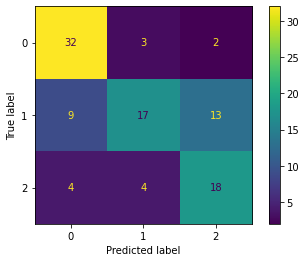

In [225]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix



clf = SVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

SVC(random_state=42)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6274509803921569


In [87]:
import pickle


In [88]:
with open("model1_predictis",'wb')as f:
    pickle.dump(classifier,f)

In [ ]:
GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
 learning_rate=0.1, loss=’deviance’, max_depth=3,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=100, presort=’auto’, random_state=None,
 subsample=1.0, verbose=0, warm_start=False)